<a href="https://colab.research.google.com/github/ahcamachod/ia-aumentada-prevision-de-atrasos-de-vuelos/blob/proyecto-final/optimizaci%C3%B3n_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASE 1**

##**02 Preparando el ambiente**

En este curso, vamos a aprender cómo construir un modelo de regresión para predecir los retrasos en vuelos. Para ello, utilizaremos las bibliotecas

Pandas,
https://pandas.pydata.org/pandas-docs/stable/

 NumPy,
 https://numpy.org/

 scikit-learn,
 https://scikit-learn.org/stable/

 Seaborn  
 https://seaborn.pydata.org/

 Yellowbrick

 https://www.scikit-yb.org/en/latest/

 en las siguientes versiones:

Biblioteca	Versión
pandas	1.5.3
numpy	1.23.5
scikit-learn (sklearn)	1.2.2
seaborn	0.12.2
yellowbrick	1.5

El código a continuación imprime las versiones de las bibliotecas:



In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


En este archivo CSV, encontrarás el material con los datos que vamos a trabajar durante el curso.

Ambiente de análisis
Vamos a usar una herramienta de Google llamada Colaboratory
https://colab.research.google.com/?hl=es

que es un Jupyter notebook y no requiere configuración para ser utilizado. Para usar Google Colaboratory es necesario tener una cuenta de Gmail, ya que todo notebook se almacenará en Google Drive.

Información importante sobre el Collaboratory
El código de tu notebook se ejecuta en una máquina virtual dedicada a tu cuenta. Estas máquinas se reciclan después de un tiempo de inactividad o cuando se cierra la ventana. Al restaurar tu notebook, será necesario volver a subir tu archivo csv y ejecutar las opciones Runtime y Restart and run all...

##**03 Entendiendo el conjunto de datos**

OPTIMIZACION AEROPORTUARIA

In [2]:
import pandas as pd

datos_fly =  pd.read_csv('/content/flights.csv')
datos_fly.shape

(71175, 11)

In [3]:
datos_fly.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
datos_fly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


LOS M,ETADATOS SON LOS DATSO SOBRE LOS DATOS

DELAY Y Arrival time esta en minutos y fraccion

LA COLUMNA DELAY ESTA EL RETRASO EN HORA Y FRACCION SE DEBERIA PASAR A FORMATO DE HORA MINUTOS Y SEGUNDOS

In [5]:
# PASANDO LA FRACCION DE MINUTOS A SEGUNDOS
#70.205981 SE TIENE 70 MINUTOS
.205981*60

12.35886

In [6]:
#12.35886 QUEDAN 12 SEGUNDOS
# PASANDO A MILI SEGUNDOS
.35886*1000

358.86

In [7]:
#  SERIA 70 MINITOS 12 SEGUNDOS Y 358.86 MILI SEGUNDOS

In [8]:
# viendo las variables numericas
datos_fly.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


describe nos umuestra de cada columna el regsumen de su comportamiento

los datos de valor negativo son valores de no restraso sino de adelanto

hasta el 25% de mi cuartiles salio con adellanto

mientras que el 50 % tiene 9 min de atraso

y el % ya tiene problemas de atraso de 27 minutos

y el masimo esta en 125 minutos que es alto

In [9]:
# viendo las variables categoricas
datos_fly.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


##**04 Finalidad del método Describe**

La Estadística Descriptiva es una rama de la Estadística que utiliza varias técnicas para describir y resumir un conjunto de datos. Es extremadamente útil en el análisis inicial de datos, proporcionando un resumen rápido y eficiente para los(as) investigadores(as). Uno de los métodos más utilizados en la estadística descriptiva es el describe().

En este sentido: ¿cuál es la finalidad principal del método describe en Pandas y qué estadísticas genera?

Calcula estadísticas resumidas de los datos en un DataFrame, incluyendo: conteo, media, desviación estándar, mínimo, cuartiles y máximo.


El método describe es una herramienta poderosa que proporciona estadísticas descriptivas de un conjunto de datos. Este método calcula varias estadísticas resumidas a la vez, incluyendo el conteo (número de elementos), media, desviación estándar (medida de dispersión de los datos), mínimo (el valor más bajo), los cuartiles (25%, 50% y 75% - correspondientes al primer cuartil, mediana y tercer cuartil, respectivamente) y el máximo (el valor más alto). Además, es posible obtener las estadísticas descriptivas para las variables categóricas: df.describe(include=['O']).

?

Alternativa correta
Se utiliza para generar una representación gráfica de los datos en un DataFrame, incluyendo histogramas y gráficos de dispersión. Proporciona información sobre la distribución de los datos.


El método describe no genera representaciones gráficas de los datos.

Alternativa correta
Permite la creación de un resumen narrativo de los datos en un DataFrame, describiendo las características generales, como nombres de las columnas y tipos de datos.


Aunque el método describe proporciona información resumida, no crea un resumen narrativo, sino estadísticas numéricas.

Alternativa correta
Realiza una operación de clasificación de los datos en un DataFrame basada en criterios específicos, como ordenación alfabética o numérica.


El método describe no realiza operaciones de clasificación, sino que calcula estadísticas sobre los datos.

##**05 Análisis gráfico del conjunto de datos**

VEMOS A VER Y HACER ANALISIS GRAFICO

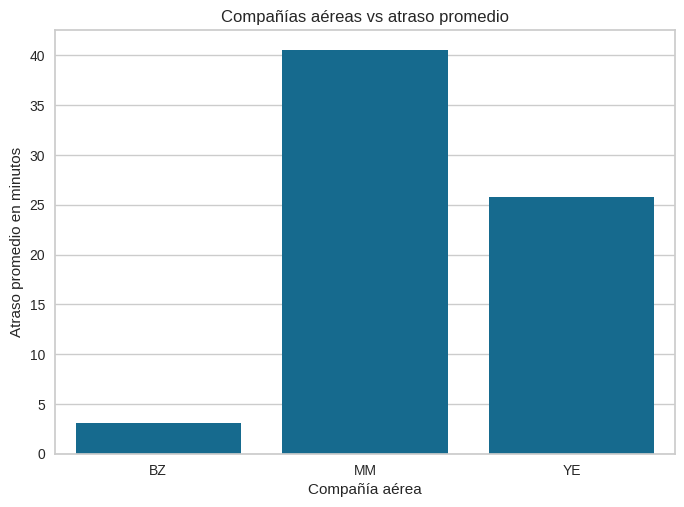

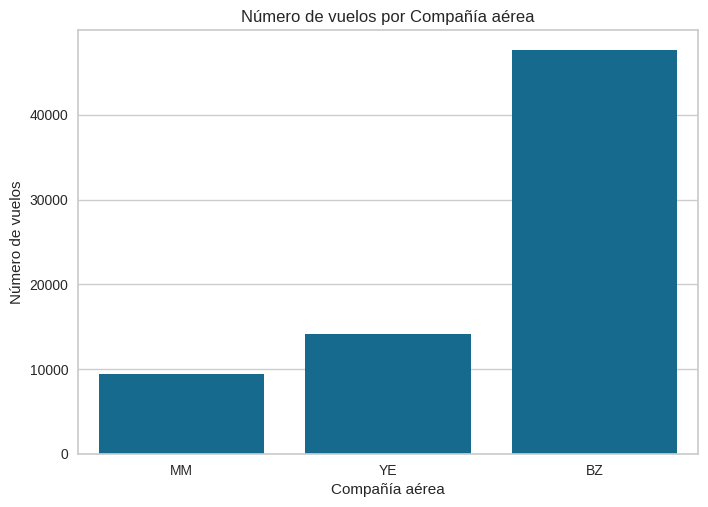

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#estadistica de aerolinea Vs retraso
avg_delay_fly = datos_fly.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline',y='delay',data=avg_delay_fly)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()
# conteo de vuelos
sns.countplot(data=datos_fly, x='airline')
plt.title('Número de vuelos por Compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

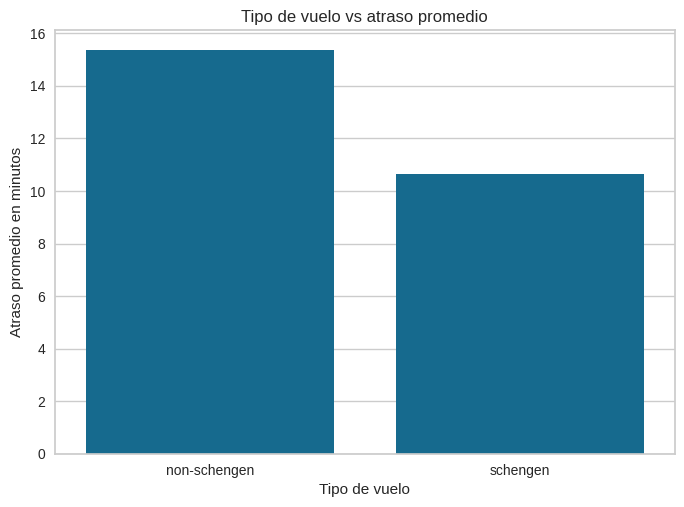

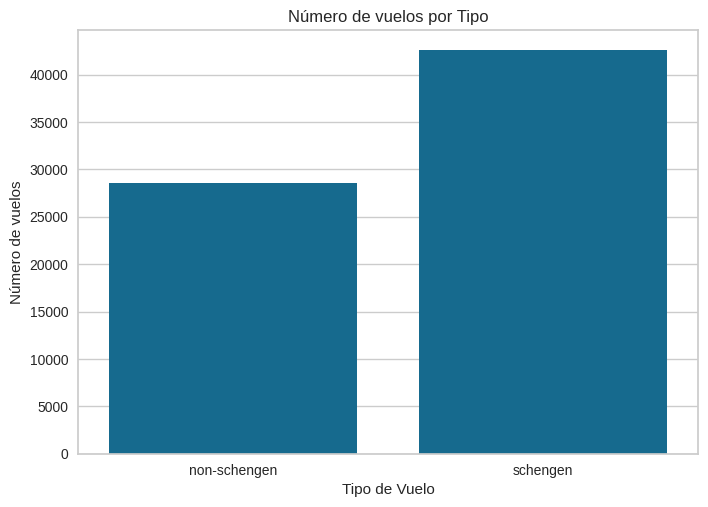

In [11]:
# revisando los atrasos de schengen
avg_delay_fly = datos_fly.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay_fly)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()
# revisando los vuelops de shengen
sns.countplot(data=datos_fly, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Número de vuelos')
plt.show()

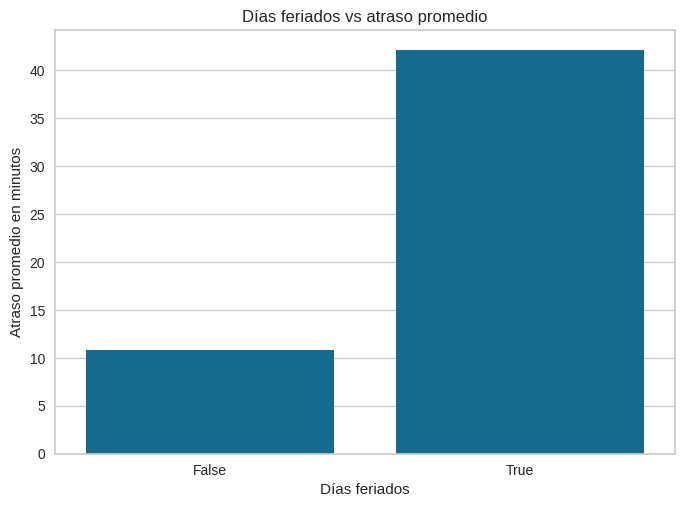

In [12]:
#revision grafica para los isholydays
# control + shif  + l sustituye varios al tiempo
avg_delay_fly = datos_fly.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay_fly)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [13]:
#vamos a tomar del data frema el tipo aircrft_type tipo de aeronave
datos_fly['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

In [14]:
# el parametro a metodo value_counts y eel . index ayudan a ordenarlas
datos_fly['aircraft_type'].value_counts()#.index

,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


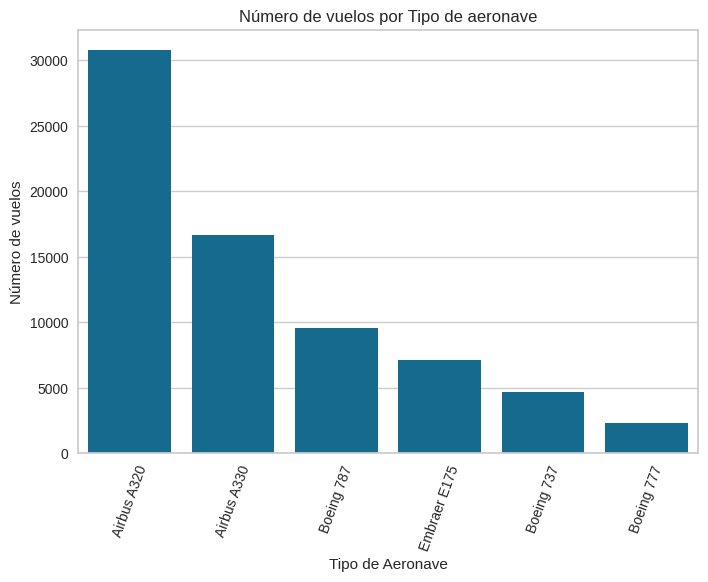

In [15]:
# el parametro a metodo value_counts y eel . index ayudan a ordenarlas
order_fly = datos_fly['aircraft_type'].value_counts().index
sns.countplot(data=datos_fly, x='aircraft_type',order=order_fly)
plt.title('Número de vuelos por Tipo de aeronave')
# parametro ritation por los nombres de aeronaves largos
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

##**06 Para saber más: el Espacio Schengen**

El Espacio Schengen es un área geográfica que abarca la mayoría de los países europeos, donde se han eliminado los controles fronterizos para permitir la libre circulación de personas entre los países miembros. Esta área recibe su nombre en referencia al Acuerdo de Schengen, firmado en 1985 en la aldea de Schengen, en Luxemburgo, e implementado en 1995.

El acuerdo fue nombrado así por el lugar de la firma, pero el tratado Schengen en sí fue un desarrollo del Acuerdo de Schengen de 1990.

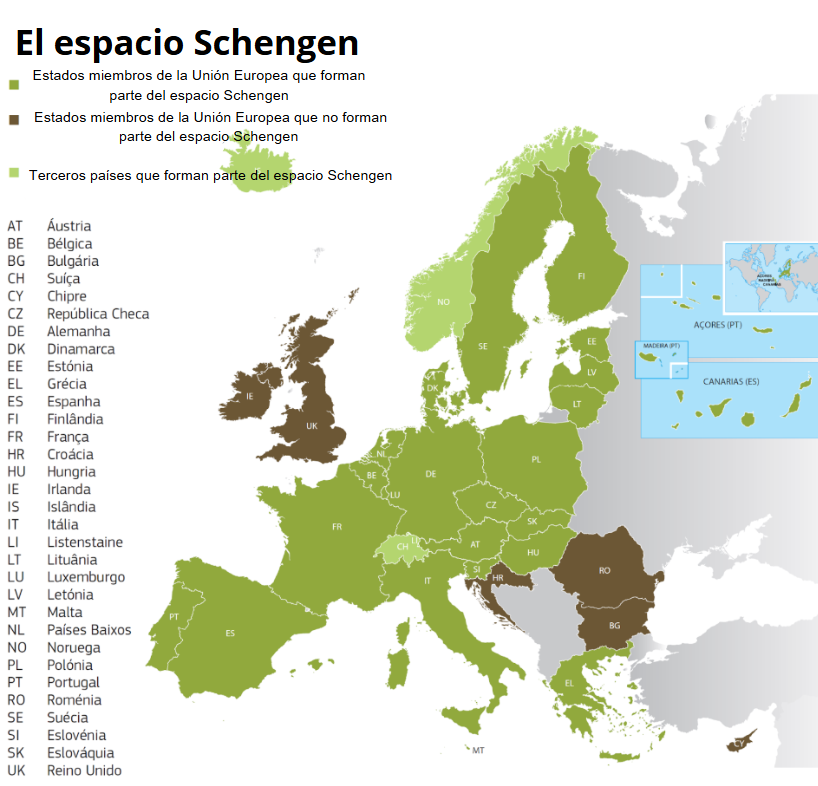

Fuente: Mapa del Espacio Schengen en 2017.

Los países que forman parte del Espacio Schengen han abolido los controles fronterizos en las fronteras internas, lo que significa que no es necesario presentar un pasaporte o pasar por verificaciones de inmigración al viajar entre estos países. En las fronteras externas, sin embargo, es más riguroso y común, para garantizar la seguridad y el control de la inmigración.

Actualmente, la mayoría de los países de la Unión Europea (UE) forman parte del Espacio Schengen, junto con Noruega, Islandia, Suiza y Liechtenstein, que no son miembros de la UE. Sin embargo, es importante notar que no todos los países de la UE han adherido al Acuerdo de Schengen.

La libre circulación dentro del Espacio Schengen facilita los viajes y el comercio entre los países miembros, convirtiéndolo en una parte fundamental de la integración europea y un ejemplo de cooperación transfronteriza en cuestiones de seguridad e inmigración.

##**07 Analizando la distribución de los datos**

<Axes: xlabel='arrival_time', ylabel='Count'>

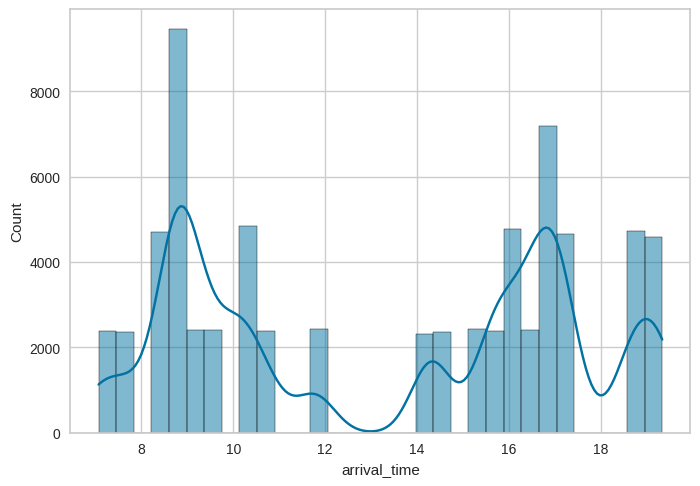

In [16]:
# generando histograma para arrival_time y KDE o curva de densidad
sns.histplot(data=datos_fly,x='arrival_time',kde=True)

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

EL VINCULO MUESTRA LA REGA PRA QUE SEA VISUALMENTE MEJOR

SE VA REVISAR EL ANCHO DE LOS BINS PARA QUE SE VISUALICE MEJOR LA GRAFICAA

<Axes: xlabel='arrival_time', ylabel='Count'>

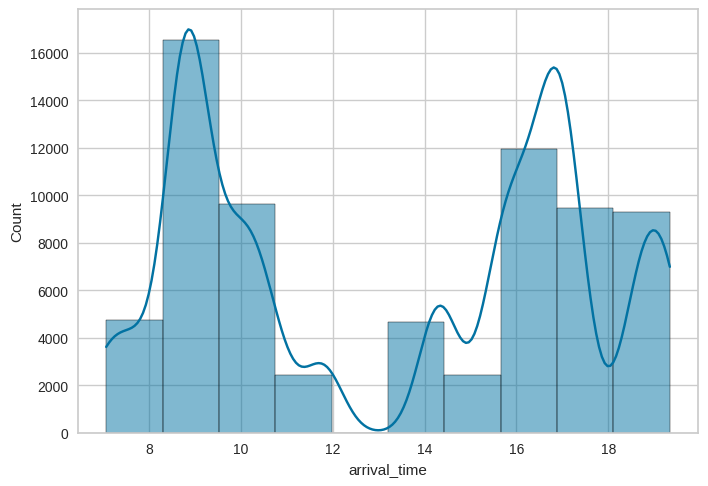

In [17]:
# ASIGNANDO EL BIN DE 10
sns.histplot(data=datos_fly,x='arrival_time',kde=True,bins=10)

In [18]:
# FUNCION PARA EL ANCHO DEL BIN
import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

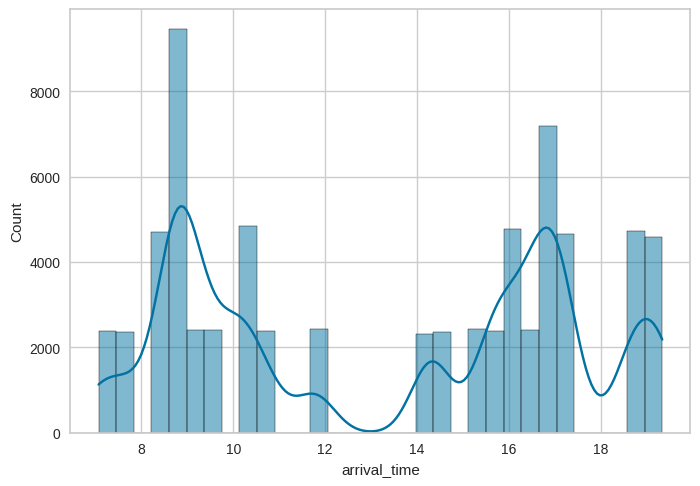

In [19]:
#histograma para arrival_time con bind whit ajustado
binwidth_fly = ancho_bin(datos_fly,'arrival_time')
sns.histplot(data=datos_fly,x='arrival_time',kde=True,binwidth=binwidth_fly)

distribucion bimodal con dos cretas

<Axes: xlabel='departure_time', ylabel='Count'>

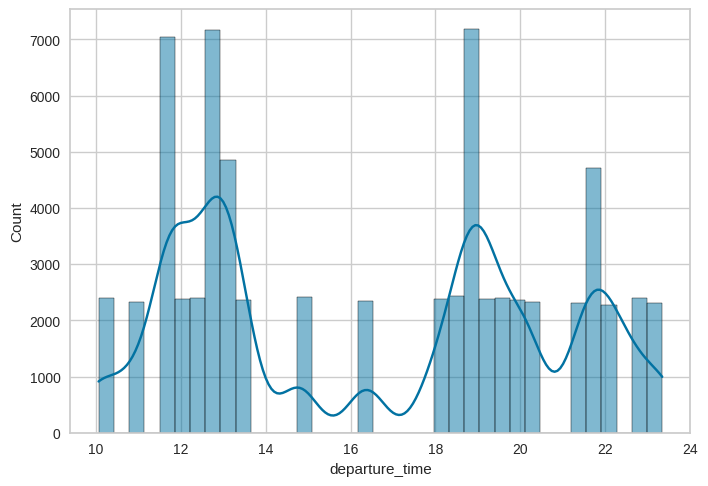

In [20]:
#histograma para departure_tim con bind whit ajustado
binwidth = ancho_bin(datos_fly,'departure_time')
sns.histplot(data=datos_fly,x='departure_time',kde=True,binwidth=binwidth)

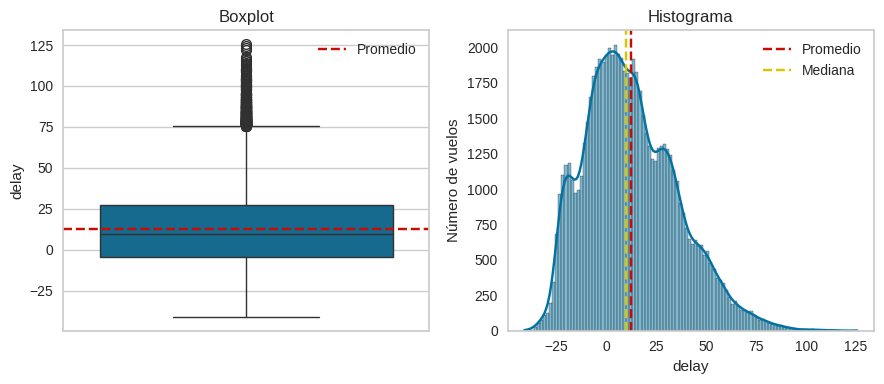

In [21]:
#extrayendo del dta frame el delay en  media y medians
atraso_promedio_fly = datos_fly['delay'].mean()
atraso_mediana_fly = datos_fly['delay'].median()
# generando el lienzo dos grafica una al lado de la otra
fig, ax = plt.subplots(1,2,figsize=(9,4))
#generando la figura ele eje y son los delay y la posicion d la izquierda se le da con  ax[0]
sns.boxplot(data=datos_fly, y='delay',ax=ax[0])
# titulo
ax[0].set_title('Boxplot')
# linea horizontal en la mitad para ver el promedio
ax[0].axhline(y=atraso_promedio_fly, color='r', linestyle='--', label='Promedio')
ax[0].legend()
# histograma
# funccion ancho de los bin
binwidth_fly = ancho_bin(datos_fly, 'delay')
# generando el lienzo
# a posicion d la izquierda se le da con  ax[1]
sns.histplot(data=datos_fly, x='delay', ax=ax[1], kde=True, binwidth=binwidth_fly)
plt.ylabel('Número de vuelos')
# haciendo la cuadricula
plt.grid(False)
# titulo del histograma
ax[1].set_title('Histograma')
# linea vertical en la mitad para ver el promedio
ax[1].axvline(x=atraso_promedio_fly, color='r', linestyle='--', label='Promedio')
# linea vertical en la posicion de la mediana
ax[1].axvline(x=atraso_mediana_fly, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

YA SE NALIZARON LOS DATOS SE HICIERON GRAFICAS PARA SABER COMO ESTAN LOS DATOS HISTORICOS TOMADOS DEL DATAFREME SE ALISTÓ TOPDO PARA INICIAR A GENERAR EL MODELO PREDICTIVO DE ATRASOS

##**08 Objetivo del boxplot**

El boxplot, también conocido como diagrama de caja, es una representación gráfica que nos permite visualizar la distribución de los datos de una forma más clara y objetiva. Está compuesto por: un rectángulo que representa la medianas y los cuartiles de los datos, además de líneas que se extienden hacia fuera del rectángulo, que muestran el rango de los datos, conforme a la imagen a continuación:

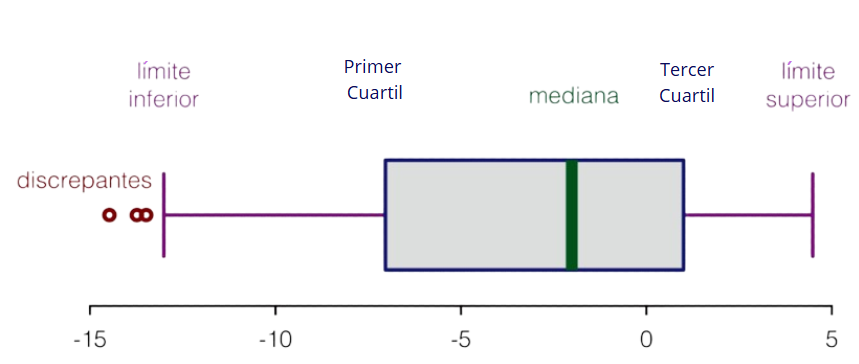

Donde:

El límite inferior es el valor mínimo que un dato puede tener sin ser considerado un valor atípico (outlier). Se calcula como Q1 - 1,5 x IQR (donde IQR es el rango intercuartílico, es decir, la diferencia entre el tercer cuartil y el primer cuartil).
El primer cuartil (Q1) es el valor que divide los datos en 25% por debajo y 75% por encima de él. Es decir, el 25% de los datos están por debajo del Q1 y el 75% están por encima.
La mediana es el valor que divide los datos en 50% por debajo y 50% por encima de él.
El tercer cuartil (Q3) es el valor que divide los datos en 75% por debajo y 25% por encima de él. Es decir, el 75% de los datos están por debajo del Q3 y el 25% están por encima.
El límite superior es el valor máximo que un dato puede tener sin ser considerado un valor atípico. Se calcula como Q3 + 1,5 x IQR.
Ante esto, podemos decir que la finalidad del boxplot es:


Visualizar la distribución de los datos e identificar posibles candidatos a outliers.


El boxplot se utiliza para visualizar la distribución de los datos e identificar posibles outliers. Muestra los cuartiles (Q1, Q2 y Q3), la mediana (Q2), además de indicar la presencia de valores extremos o discrepantes.

:

Alternativa correta
Resumir estadísticas descriptivas como media, varianza y desviación estándar de los datos.


El boxplot no resume estadísticas descriptivas como media, varianza y desviación estándar de los datos. Su objetivo principal es representar gráficamente la distribución y la presencia de outliers en los datos.

.

Alternativa correta
Calcular la moda y la mediana de los datos.


Aunque el boxplot muestra la mediana, no calcula la moda de los datos. La moda representa el valor más frecuente en un conjunto de datos, mientras que el boxplot se concentra en la representación gráfica de la distribución de los datos.

Alternativa correta
Representar gráficamente la media de los datos analizados.


Con el boxplot, podemos visualizar diversas informaciones de forma gráfica sobre la distribución de los datos. Sin embargo, el boxplot no representa la media.

 ##**09 Hago lo que hicimos**

En esta clase, realizamos el análisis exploratorio de los datos construyendo gráficos y analizando las estadísticas descriptivas del conjunto de datos referente a los retrasos de vuelos.

Entonces, llegó el momento de que tú realices el paso a paso ejecutado durante la clase.

Si tienes dudas, revisa el avance de tu proyecto haciendo clic en la opción Opinión de la persona instructora a continuación.

Opinión del instructor

1 - El primer paso es leer el archivo CSV utilizando Pandas:

```python
# Tiene formato de código
import pandas as pd
datos = pd.read_csv('flights.csv')
```



2 - Imprime las estadísticas descriptivas utilizando los métodos describe y info.
```python
# Tiene formato de código
datos.describe()  # Estadísticas descriptivas para las variables numéricas

datos.describe(include='O')  # Estadísticas descriptivas para las variables del tipo “object”

datos.info()
```


3 - Construye las visualizaciones gráficas:


```python
# Tiene formato de código

# Importando las bibliotecas necesarias

import matplotlib.pyplot as plt
import seaborn as sns
```



A continuación, vamos a construir dos gráficos: uno de "Aerolíneas vs Retrasos promedio", para poder identificar qué aerolínea tiene mayor retraso promedio; y otro de "Número de vuelos por aerolínea".

```python
# Tiene formato de código
retraso_promedio = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=retraso_promedio)
plt.title('Aerolíneas vs retrasos promedio')
plt.xlabel('Aerolíneas')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Número de vuelos')
plt.show()
```



Los próximos gráficos a construir son: Tipo de vuelo vs Retrasos promedio y Número de vuelos por tipo de vuelo.


```python
# Tiene formato de código

retraso_promedio = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=retraso_promedio)
plt.title('Tipo de vuelo vs retrasos promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por tipo de vuelo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()
```



También construiremos un gráfico para analizar si hay más retrasos en días festivos:


```python
# Tiene formato de código
retraso_promedio = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=retraso_promedio)
plt.title('Día festivo vs retrasos promedio')
plt.xlabel('¿Es día festivo?')
plt.ylabel('Retraso promedio en minutos')
plt.show()
```



El siguiente gráfico es el de Número de vuelos por tipo de aeronave:

```python
# Tiene formato de código

orden = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type', order=orden)
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()
```



4 - Analiza la distribución de los datos.

Es importante analizar la distribución de los datos antes de ingresarlos en un modelo de regresión para garantizar que el modelo sea apropiado para los datos. La distribución de estos puede afectar la precisión del modelo, por lo que es importante asegurarse de que los datos estén distribuidos de manera adecuada antes de realizar el análisis. Además, el análisis de la distribución de los datos puede ayudar a identificar valores atípicos y decidir cómo manejarlos antes de realizar el análisis.

El primer paso es definir un ancho para los bins. Los bins, en un histograma, son intervalos de valores que se utilizan para agrupar los datos en clases. Para definir este ancho, utilizaremos la Regla de Freedman-Diaconis
https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
que matemáticamente se define como:

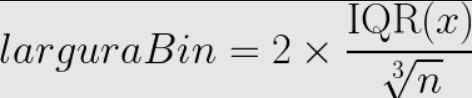

CODIGO


```python
# Tiene formato de código
import numpy as np

def calcular_ancho_bin(df, columna):
    Q75, Q25 = np.percentile(df[columna], [75, 25])
    IQR = Q75 - Q25
    ancho_bin = 2 * IQR * np.power(len(df[columna]), -1/3)
    return ancho_bin
```



Ahora vamos a construir los histogramas para la hora de llegada y la hora de salida de los aviones.

```python
# Tiene formato de código
ancho_bin_at = calcular_ancho_bin(datos, 'arrival_time')
ancho_bin_dt = calcular_ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=ancho_bin_at)
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=ancho_bin_dt)
```



Y por último, vamos a construir un boxplot y un histograma de la variable objetivo (delay).

```python
# Tiene formato de código
media_retraso = datos['delay'].mean()
mediana_retraso = datos['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=datos, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=media_retraso, color='r', linestyle='--', label='Media')
axes[0].legend()

ancho_bin_delay = calcular_ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=axes[1], kde=True, binwidth=ancho_bin_delay)
plt.ylabel('Número de vuelos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=media_retraso, color='r', linestyle='--', label='Media')
axes[1].axvline(x=mediana_retraso, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()
```



##**10 Lo que aprendimos**

En esta clase, aprendiste a:
Analizar las estadísticas descriptivas de los datos;
Obtener información relevante de los datos, como la cantidad de datos nulos y el tipo de las columnas;
Construir el análisis gráfico de los datos;
Construir la visualización gráfica de la distribución de los datos.

#**CLASE 2**

##**02 Creando nuevas columnas**##

LUEGO DEL ANALISIS EXPLORATORIO DE GENERAR GRAFICAS HISTOGRAM Y BOSXPLOT SE VE QUE EL DATA FRAME ESTA EN UNA DISTRIBUCION PAR ALA VARIABLE RESPUESTA QUE PARA ESTE CASO SON LOS RETRASOS

PREOCEDEMOS A GENERAR LA INGENIERIA DE ATRIBUTOS O **feature engineering**

In [22]:
#revisando el contenido del data frame
datos_fly.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [23]:
# generando la columna date con el formato fecha , summando year con day
# las tecalas control + shift + l para cambiar una variable en dotra la celda de un solo tecleo
# se convierten con astype a day se le da +1
# borado de una columna
# datos_fly = datos_fly.drop(columns=['columna a borrar'])
# genera la comuna date con año y dia
datos_fly['date'] = datos_fly['year'].astype(str) +'-'+(datos_fly['day']+1).astype(str)
# con date time es de año %Y-%j solo j suma y reinicia en el siguiente año cuando llegue a 365
datos_fly['date'] = pd.to_datetime(datos_fly['date'],format='%Y-%j')
# visualizar las dos ultimas
datos_fly.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [24]:
# viasualizando y crando columna si es fin de semana
datos_fly['is_weekend'] = datos_fly['date'].dt.weekday.isin([5,6])
#creando  la colmna de que dia estamos fisualizando
datos_fly['day_name'] = datos_fly['date'].dt.day_name()
# visualizando aleatoriamente 5 filas
datos_fly.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
55616,30,BZ,Embraer E175,schengen,PUA,8.923441,12.923441,57,2020,False,5.791095,2020-02-27,False,Thursday
15136,23,YE,Embraer E175,schengen,TCY,18.801235,21.801235,279,2012,False,41.842770,2012-10-06,True,Saturday
7583,14,BZ,Airbus A330,schengen,ZQO,7.708301,11.708301,140,2011,False,2.433767,2011-05-21,True,Saturday
54833,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,5,2020,False,7.163356,2020-01-06,False,Monday
60206,6,YE,Boeing 787,schengen,AUZ,17.033688,19.033688,363,2020,False,26.030058,2020-12-29,False,Tuesday


##**03 Para saber más: ¿qué es el feature engineering?**

El feature engineering es un concepto fundamental en el campo de la ciencia de datos y el aprendizaje automático, y desempeña un papel crucial en el proceso de desarrollo de modelos predictivos y analíticos. Esta técnica implica la creación, transformación y selección de variables, también conocidas como "features", a partir de los datos brutos disponibles, con el fin de mejorar el rendimiento de los modelos. Pero, ¿qué serían features?

¿Qué son las features?
Las features son las variables o atributos que un modelo de machine learning utiliza para hacer predicciones o clasificaciones. Representan la información que el modelo tiene a su disposición para aprender patrones en los datos. Por ejemplo, si estamos construyendo un modelo para predecir el precio de una casa, las features pueden incluir el número de habitaciones, la superficie en metros cuadrados, la ubicación geográfica, la proximidad a escuelas, entre otras.

La importancia del Feature Engineering:
Mejora el rendimiento del modelo: Elegir las features correctas y transformarlas adecuadamente puede resultar en modelos más precisos y eficientes. Features bien diseñadas pueden capturar información relevante y eliminar ruido en los datos.
Reduce la dimensionalidad: En conjuntos de datos con muchas features, la dimensionalidad de los datos puede convertirse en un problema. El feature engineering puede ayudar a reducir la cantidad de features, manteniendo solo aquellas que son realmente informativas para el modelo.
Técnicas de Feature Engineering:
Existen varias técnicas de feature engineering, incluyendo:

Creación de features: Esto implica la creación de nuevas features basadas en las existentes. Por ejemplo, combinar las features de superficie y valor de una propiedad para crear una feature que represente el valor por metro cuadrado de esa propiedad. O, si tienes datos de fecha y hora, puedes crear una nueva característica que represente el día de la semana. Esto puede ser útil porque tal vez haya patrones que ocurren en días específicos de la semana.
Transformación de features: Se pueden aplicar funciones matemáticas a las features existentes para hacerlas más adecuadas para el modelo. Ejemplos incluyen aplicar logaritmos o escalar valores para reducir la escala en la que se encuentra la variable.
Selección de features: No todas las features son igualmente importantes. La selección de features implica identificar y mantener solo las más relevantes para el problema en cuestión.

##**04 Feature engineering y su importancia**

.

Alternativa correta
La Feature engineering implica la creación, transformación y selección de variables a partir de datos en bruto.


La Feature engineering es un proceso que implica la creación, transformación y selección de variables a partir de datos en bruto. El objetivo es mejorar la precisión del modelo, proporcionando información más significativa y relevante.

La Feature engineering se refiere a la visualización de datos en gráficos y gráficos de barras.


Aunque la visualización de datos puede ser una etapa en el proceso de Feature engineering, no define el concepto en su totalidad.

La Feature engineering se refiere a la visualización de datos en gráficos y gráficos de barras.


Aunque la visualización de datos puede ser una etapa en el proceso de Feature engineering, no define el concepto en su totalidad.

##**05 Feature encoding**

CODIFICANDO LOS DATOS

In [25]:
datos_fly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [26]:
# EVITANDO QUE SE PUBLIQUEN TODOS LOS WARNINGS
import warnings

warnings.filterwarnings('ignore')

In [27]:
# CAMBIAR VARIAS VARIABLES AL TIEMPO CON TECLAS CONTROL + SHIFT + L
#PASANDO LAS NON-SHANGEN A 0 Y LA SHENGEN A 1 EN LA COLUMNA SHENGEN
datos_fly['schengen'] = datos_fly['schengen'].replace({'non-schengen':0,'schengen':1})
# PARA LA COLUMNA IS_HOLYDAY TAMBIEN A 0 Y 1
datos_fly['is_holiday'] = datos_fly['is_holiday'].replace({False:0,True:1})
# LA COLUMNA IS WEEKEND TAMBIAN CAMBIAR A CERO Y UNO
datos_fly['is_weekend'] = datos_fly['is_weekend'].replace({False:0,True:1})
datos_fly.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
28137,24,BZ,Airbus A320,1,FJB,9.668655,12.668655,50,2015,0,3.725218,2015-02-20,0,Friday
42214,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,259,2017,0,-9.987934,2017-09-17,1,Sunday
49609,8,BZ,Airbus A320,1,ZQO,15.729617,18.729617,22,2019,0,-0.643734,2019-01-23,0,Wednesday


In [28]:
#revisando los nombres de las columnas
datos_fly.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay',
       'date', 'is_weekend', 'day_name'],
      dtype='object')

In [29]:
# las variables categoricas las vamos a colocar en lista 'airline','aircraft_type','origin','day_name'
categoricas_fly = ['airline','aircraft_type','origin','day_name']
# pasando las varibles categoricas a 0 y 1 con el metodo de pandasw get dummies
pd.get_dummies(data=datos_fly,columns=categoricas_fly, dtype=int).head()
# se visauliza que asigna 1 al que es verdadero y 0 a que no cumple para los dias de la semana son 7 bites

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
# guardando el nuevo data frame
datos_codificados_fy =pd.get_dummies(data=datos_fly,columns=categoricas_fly, dtype=int)
datos_codificados_fy.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
68641,4,1,11.781391,14.781391,196,2022,0,-8.459879,2022-07-16,1,...,1,0,0,0,0,1,0,0,0,0
57037,1,0,15.496519,18.496519,152,2020,0,11.113549,2020-06-01,0,...,0,0,0,0,1,0,0,0,0,0
59334,17,0,16.718722,21.718722,305,2020,0,-7.492083,2020-11-01,1,...,0,0,0,0,0,0,1,0,0,0
47170,27,1,14.376052,16.376052,224,2018,0,19.121495,2018-08-13,0,...,0,0,0,0,1,0,0,0,0,0
50920,17,0,16.718722,21.718722,109,2019,0,-1.479325,2019-04-20,1,...,0,0,0,0,0,1,0,0,0,0


YA LOS DATOS CODIFICADOS SE DEBE HACER UNA DEPURACION

 06 Limpiando los datos

ANLIZANDO LAS VARIABLE PARA MEJORAR EL DEPURADO

In [31]:
# revisando la corelacion de arrval_time y departure_time
# las correlaciones negativas son inversamente proporcional
# las correlaciones positivas son directamente proporcionales
datos_fly[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


ESTAS DSO VARIABLES PUEDEN ACABAR CESGANDO EL MODELO

In [32]:
datos_codificados_fy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

LAS ANTERIORES SE DEBEN DEPURAR

In [33]:
# se genera el nuevo data frame para depurar los datos
# se extraen las siguientes columnas  'flight_id','departure_time','day','year','date'
df_fly = datos_codificados_fy.drop(columns=['flight_id','departure_time','day','year','date'])
df_fly.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
53658,1,18.635384,0,-24.913158,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
23805,0,17.041281,0,56.753914,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26107,1,17.313731,0,45.240226,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
33524,0,8.794147,0,52.905310,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
27328,0,17.041281,0,49.336434,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
57414,0,8.939996,1,65.093387,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
14205,0,15.967963,1,36.033305,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3278,1,8.591208,0,0.089155,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
49254,1,18.801235,0,23.926977,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
13106,0,17.041281,0,61.182775,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


##**07 Manos a la obra: ¿cómo utilizar el OneHotEncoder de Sklearn?**

Existen algunas formas de realizar la codificación dummy de las variables que son categóricas. Dos de ellas son usando el método get_dummies
https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
de la biblioteca Pandas y el OneHotEncoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
 de la biblioteca sklearn. Durante el curso, optamos por el primer enfoque. Según el código a continuación:

```python
# Tiene formato de código
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)
df_encoded.head()

```



¡Ahora es el momento de poner en práctica otro enfoque!

Aplica la codificación dummy en el código de la clase utilizando el OneHotEncoder de Scikit-Learn en lugar del get_dummies de la biblioteca pandas.

Opinión del instructor

Para utilizar el OneHotEncoder en lugar del get_dummies de la biblioteca Pandas podemos hacerlo de la siguiente manera:

```python
# Tiene formato de código

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas = ['airline','aircraft_type','origin','day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos
```



Analizando el código anterior paso a paso:

1 - from sklearn.compose import make_column_transformer

Este es un import del método make_column_transformer de la biblioteca sklearn.compose. Este método se usa para aplicar transformaciones específicas a columnas específicas de un DataFrame.

2 - from sklearn.preprocessing import OneHotEncoder

Este es un import del OneHotEncoder de la biblioteca sklearn.preprocessing. Este es el método que realmente realiza la codificación one-hot.

3 - categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

Aquí, estamos definiendo una lista de nombres de columnas que queremos transformar usando la codificación one-hot, que son las mismas definidas utilizando el get_dummies.

4 - one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categoricas), remainder='passthrough')

Aquí, estamos creando un ColumnTransformer que aplica el OneHotEncoder a las columnas especificadas en categoricas. El argumento handle_unknown='ignore' significa que el OneHotEncoder ignorará cualquier categoría desconocida que pueda aparecer durante la transformación. El argumento remainder='passthrough' significa que cualquier columna que no esté especificada para la transformación será pasada a través sin cambios.

5 - datos = one_hot_enc.fit_transform(datos)

Aquí, estamos aplicando la transformación al DataFrame datos. El método fit_transform ajusta el transformador a los datos y luego transforma los datos.

6 - datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())

Aquí, estamos convirtiendo los datos transformados de nuevo a un DataFrame. También estamos definiendo los nombres de las columnas para que sean los nombres de características de salida del ColumnTransformer.

##**07 Manos a la obra: ¿cómo utilizar el OneHotEncoder de Sklearn?**

In [34]:
import pandas as pd

datos_fly_A =  pd.read_csv('/content/flights.csv')
datos_fly_A.shape

(71175, 11)

In [35]:
datos_fly_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [36]:
datos_fly_A.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [37]:
# generando la columna date con el formato fecha , summando year con day
# las tecalas control + shift + l para cambiar una variable en dotra la celda de un solo tecleo
# se convierten con astype a day se le da +1
# borado de una columna
# datos_fly_A = datos_fly_A.drop(columns=['columna a borrar'])
# genera la comuna date con año y dia
datos_fly_A['date'] = datos_fly_A['year'].astype(str) +'-'+(datos_fly_A['day']+1).astype(str)
# con date time es de año %Y-%j solo j suma y reinicia en el siguiente año cuando llegue a 365
datos_fly_A['date'] = pd.to_datetime(datos_fly_A['date'],format='%Y-%j')
# visualizar las dos ultimas
datos_fly_A.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [38]:
# viasualizando y crando columna si es fin de semana
datos_fly_A['is_weekend'] = datos_fly_A['date'].dt.weekday.isin([5,6])
#creando  la colmna de que dia estamos fisualizando
datos_fly_A['day_name'] = datos_fly_A['date'].dt.day_name()
# visualizando aleatoriamente 5 filas
datos_fly_A.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
1942,16,MM,Airbus A320,non-schengen,CSF,17.041281,20.041281,129,2010,False,50.825511,2010-05-10,False,Monday
57641,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,192,2020,False,-21.595371,2020-07-11,True,Saturday
22754,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,56,2014,False,6.347707,2014-02-26,False,Wednesday
41698,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,224,2017,False,31.396199,2017-08-13,True,Sunday
42985,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,310,2017,False,-7.774364,2017-11-07,False,Tuesday


In [39]:
# CAMBIAR VARIAS VARIABLES AL TIEMPO CON TECLAS CONTROL + SHIFT + L
#PASANDO LAS NON-SHANGEN A 0 Y LA SHENGEN A 1 EN LA COLUMNA SHENGEN
#datos_fly_A['schengen'] = datos_fly_A['schengen'].replace({'non-schengen':0,'schengen':1})
# PARA LA COLUMNA IS_HOLYDAY TAMBIEN A 0 Y 1
#datos_fly_A['is_holiday'] = datos_fly_A['is_holiday'].replace({False:0,True:1})
# LA COLUMNA IS WEEKEND TAMBIAN CAMBIAR A CERO Y UNO
#datos_fly_A['is_weekend'] = datos_fly_A['is_weekend'].replace({False:0,True:1})
#datos_fly_A.sample(3)

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas_fly_A = ['airline','aircraft_type','origin','day_name']

one_hot_enc_fly_A = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas_fly_A),
    remainder='passthrough')

datos_fly_A = one_hot_enc_fly_A.fit_transform(datos_fly_A)
datos_fly_A = pd.DataFrame(datos_fly_A, columns=one_hot_enc_fly_A.get_feature_names_out())
datos_fly_A

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,non-schengen,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,non-schengen,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,schengen,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28,non-schengen,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,non-schengen,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,schengen,18.635384,22.635384,364,2022,True,25.677277,2022-12-31,True
71171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,17,non-schengen,16.718722,21.718722,364,2022,True,52.624348,2022-12-31,True
71172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7,schengen,8.564949,13.564949,364,2022,True,56.16708,2022-12-31,True
71173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,schengen,9.344097,12.344097,364,2022,True,56.758844,2022-12-31,True


In [41]:
datos_fly_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   onehotencoder__airline_BZ                  71175 non-null  object        
 1   onehotencoder__airline_MM                  71175 non-null  object        
 2   onehotencoder__airline_YE                  71175 non-null  object        
 3   onehotencoder__aircraft_type_Airbus A320   71175 non-null  object        
 4   onehotencoder__aircraft_type_Airbus A330   71175 non-null  object        
 5   onehotencoder__aircraft_type_Boeing 737    71175 non-null  object        
 6   onehotencoder__aircraft_type_Boeing 777    71175 non-null  object        
 7   onehotencoder__aircraft_type_Boeing 787    71175 non-null  object        
 8   onehotencoder__aircraft_type_Embraer E175  71175 non-null  object        
 9   onehotencoder__or

##**08 Haga lo que hicimos**

En esta clase, realizamos la feature engineering de la base de datos sobre retrasos de vuelos. La feature engineering es el proceso de seleccionar, extraer y transformar variables (también conocidas como características). Creamos tres nuevas columnas (date, is_weekend y day_name). Justo después de la creación de las nuevas columnas, realizamos la codificación de características de las variables categóricas y, por último, realizamos la limpieza de los datos.

Ahora, es el momento de que sigas el paso a paso realizado durante la clase.

Si surgen preguntas, verifica el progreso de tu proyecto al seleccionar Opinión de la persona instructora.

Opinión del instructor

1 - Vamos a crear 3 nuevas columnas para el conjunto de datos date, is_weekend y day_name:


```python
# Tiene formato de código
# Columna “date”
datos['date'] = pd.to_datetime(datos['year'].astype(str) + '-' + (datos['day'] + 1).astype(str), format='%Y-%j')

# Columna “is_weekend”
datos['is_weekend'] = datos['date'].dt.weekday.isin([5, 6])

# Columna “day_name”
datos['day_name'] = datos['date'].dt.day_name()
```



2 - El siguiente paso es realizar la codificación de las variables que son categóricas. Vamos a transformar las variables categóricas binarias en 0 y 1, y para las demás variables categóricas, utilizaremos el método get_dummies.
```python
# Tiene formato de código
# Variables categóricas binarias

datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen': 1})
datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True: 1})
datos['is_weekend'] = datos['is_weekend'].replace({False: 0, True: 1})
```

otroo paso



```phyton
# Tiene formato de código
variables_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']
df_encoded = pd.get_dummies(data=datos, columns=variables_categoricas, dtype=int)
```





3 - Por último, vamos a limpiar los datos. Para esto, vamos a eliminar las columnas 'flight_id', 'departure_time', 'day', 'year' y 'date' del conjunto de datos.


```python
# Tiene formato de código
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)

```
fin del ejercicio con dummies


##**09 Lo que aprendimos**

En esta clase, aprendiste a:
Construir nuevas columnas;
Hacer el encoding de las variables categóricas;
Realizar el análisis de correlación;
Analizar y eliminar las columnas no relevantes.

#**CLASE 3**

##**02 Definiendo una baseline**

VAMOS A CREAR POR SCIKIT LEARN

https://scikit-learn.org/stable/

In [42]:
# para crear una base line
from sklearn.dummy import DummyRegressor
# para crear las data fream de entrenamiento y test
from sklearn.model_selection import train_test_split


In [43]:
df_fly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   schengen                    71175 non-null  int64  
 1   arrival_time                71175 non-null  float64
 2   is_holiday                  71175 non-null  int64  
 3   delay                       71175 non-null  float64
 4   is_weekend                  71175 non-null  int64  
 5   airline_BZ                  71175 non-null  int64  
 6   airline_MM                  71175 non-null  int64  
 7   airline_YE                  71175 non-null  int64  
 8   aircraft_type_Airbus A320   71175 non-null  int64  
 9   aircraft_type_Airbus A330   71175 non-null  int64  
 10  aircraft_type_Boeing 737    71175 non-null  int64  
 11  aircraft_type_Boeing 777    71175 non-null  int64  
 12  aircraft_type_Boeing 787    71175 non-null  int64  
 13  aircraft_type_Embraer E175  711

In [44]:
df_fly.columns

Index(['schengen', 'arrival_time', 'is_holiday', 'delay', 'is_weekend',
       'airline_BZ', 'airline_MM', 'airline_YE', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Boeing 737',
       'aircraft_type_Boeing 777', 'aircraft_type_Boeing 787',
       'aircraft_type_Embraer E175', 'origin_AUZ', 'origin_CNU', 'origin_CSF',
       'origin_EMM', 'origin_FJB', 'origin_MWL', 'origin_PUA', 'origin_TCY',
       'origin_TZF', 'origin_ZQO', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')

In [45]:
X_fly = df_fly.drop(['delay'],axis=1)
y_fly = df_fly['delay']
# segregando
X_train_fly, X_test_fly, y_train_fly, y_test_fly = train_test_split(X_fly,y_fly,test_size=0.3,random_state=42)

baseline_fly = DummyRegressor()
baseline_fly.fit(X_train_fly,y_train_fly)

DummyRegressor()

In [46]:
# evaluando utilizando metricas
# las metricas usadas mean_squared_error, mean_absolute_error, r2_score
# r2_score cuando mas cerca este a 1 mejor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# extrayendo las predicciones del modelo de dummies
y_pred_dummy_fly = baseline_fly.predict(X_test_fly)

# funcion generada recibe el y test real y los valores predichos
def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  # el roun con solo cuatro casillas decimales
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [47]:
resultados_baseline_fly = calcular_regresion(y_test_fly, y_pred_dummy_fly)


In [48]:
resultados_baseline_fly

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

ESTE MODELO NO ESTA GENERALIZANDO DE FORMA CORRETA CON ESAS METRICAS

##**03 Para saber más: métricas utilizadas en regresión**

Durante el video, se presentaron algunas de las métricas más comunes para evaluar modelos de regresión, como RMSE, MAE y R2. Junto con estas métricas, existen diversas otras que pueden ser bastante útiles durante la evaluación de un modelo de regresión. A continuación, podrás encontrar algunas de las métricas más utilizadas y sus traducciones en español:

Mean squared error - MSE (Error Cuadrático Medio);
Mean absolute error - MAE (Error Absoluto Medio);
Root Mean Squared Error - RMSE (Raíz Cuadrada del Error Cuadrático Medio);
Mean Squared Logarithmic Error - MSLE (Error Logarítmico Cuadrático Medio); y
Mean Absolute Percentage Error - MAPE (Porcentaje del Error Absoluto Medio).
Mean squared error - MSE
El Mean Squared Error (MSE), o Error Cuadrático Medio, es una métrica ampliamente utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. Esta métrica calcula la media de los errores cuadrados, donde cada error es la diferencia entre el valor previsto por el modelo y el valor real. La elevación al cuadrado da mayor peso a los errores mayores, lo que puede ser útil cuando esos errores son particularmente indeseables. El MSE se define matemáticamente como:

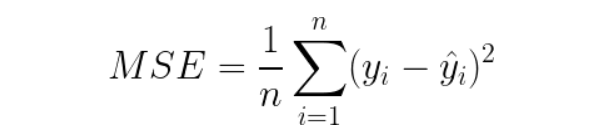

En esta fórmula, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSE se calcula tomando la diferencia entre los valores reales y los valores predichos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

Para evaluar la calidad de un modelo usando el MSE, cuanto más cerca de 0 esté el valor del MSE, mejor estará el modelo en predecir los valores deseados. Esto se debe a que un MSE de 0 indica que no hay diferencia entre los valores previstos y los valores reales, es decir, el modelo está haciendo predicciones perfectas.

Aunque el MSE es una métrica útil, vale la pena mencionar que tiene la desventaja de dar más peso a los outliers debido al cuadrado de cada término. Esto puede ser indeseable en muchos casos, llevando a los investigadores a usar alternativas, como el error absoluto medio (MAE).

La documentación de scikit-learn tiene información que ofrece más detalles sobre esta métrica en “mean_squared_error”.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

Mean absolute error - MAE
El Error Absoluto Medio (MAE) es una medida de error común utilizada en modelos de regresión. Se calcula tomando la media de los valores absolutos de los errores. En otras palabras, para cada punto de datos, primero calculamos el error (la diferencia entre el valor predicho y el valor real), tomamos el valor absoluto de ese error (para asegurar que todos los errores sean positivos), y luego calculamos la media de todos estos errores absolutos. El MAE se define como:

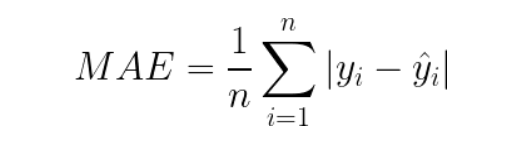

En esta ecuación, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MAE se calcula tomando la diferencia absoluta entre los valores reales y los valores predichos para todas las observaciones, sumando estas diferencias absolutas y, a continuación, dividiendo por el número de observaciones "n".

El MAE es similar a la Métrica del Error Cuadrático Medio (MSE), pero en lugar de elevar los errores al cuadrado, simplemente toma el valor absoluto de los errores. Esto hace que el MAE sea menos sensible a outliers que el MSE, ya que los errores grandes no se amplifican por el cuadrado.

Al evaluar modelos de regresión con el MAE, un valor menor indica un modelo más preciso. En otras palabras, cuanto menor sea el MAE, mejor será el modelo en predecir el valor correcto para nuevos datos. El MAE tiene un límite inferior de 0, que indica un modelo perfecto (es decir, todas las predicciones son exactas).

Cabe destacar que, aunque el MAE es una métrica útil, no debe ser la única métrica utilizada para evaluar el rendimiento de un modelo de regresión. Otras métricas, como el MSE, la Raíz Cuadrada del Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R2), también deben ser consideradas para obtener una evaluación completa de la capacidad de un modelo para hacer predicciones precisas.

La documentación de scikit-learn ofrece más detalles sobre esta métrica en “MAE”.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

Root Mean Squared Error - RMSE
La Raíz Cuadrada del Error Cuadrático Medio (RMSE) es una métrica de evaluación comúnmente utilizada en modelos de regresión, que es esencialmente la raíz cuadrada del MSE (Error Cuadrático Medio). El RMSE se calcula tomando la raíz cuadrada de la media de los errores cuadrados, que son las diferencias entre los valores previstos y los valores reales, elevadas al cuadrado. Matemáticamente, el RMSE se define como:



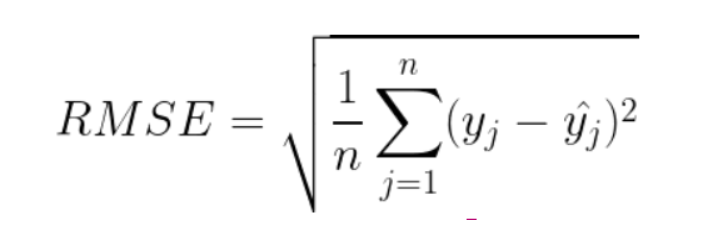

Donde:

n es el número de muestras;
Ŷ_j es la predicción del modelo para la muestra j;
Y_j es el valor real para la muestra j.
El RMSE es una medida de la dispersión de los residuos (errores de predicción) y, al igual que el MSE, penaliza los errores mayores de forma más severa que los errores menores, debido al hecho de elevar al cuadrado las diferencias. Esto lo hace particularmente sensible a grandes errores.

Un valor menor de RMSE indica un mejor ajuste del modelo a los datos, es decir, las predicciones del modelo están más cerca de los valores reales. Es importante resaltar que, aunque el RMSE es una métrica útil, no debe ser la única métrica considerada al evaluar la calidad de un modelo de regresión.

Puedes acceder a la documentación de scikit-learn para saber más sobre esta métrica: metrics.mean_squared_error.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

Mean Squared Logarithmic Error - MSLE
El Error Logarítmico Cuadrático Medio es una métrica de evaluación utilizada en problemas de predicción donde la escala de los valores objetivo o de las predicciones varía significativamente y los errores relativos son más importantes que los errores absolutos. El MSLE mide el error cuadrático medio entre los logaritmos naturales de los valores reales y los logaritmos naturales de las predicciones. Matemáticamente, se puede definir el MSLE de la siguiente manera:

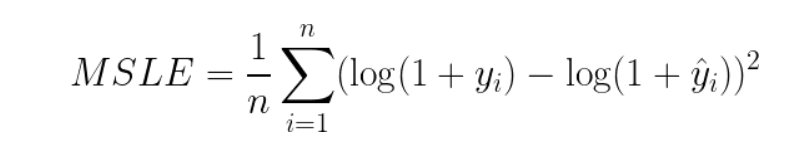

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSLE se calcula tomando el logaritmo natural de los valores reales y predichos sumados a 1, calculando la diferencia entre estos logaritmos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

El principal punto de enfoque de esta métrica es medir la diferencia relativa entre los valores esperados y los predichos por el modelo, es decir, verifica la diferencia porcentual entre ellos. De modo que, pequeñas diferencias entre valores pequeños son tratadas igualmente a grandes diferencias entre valores grandes, a diferencia de lo que ocurre en el MSE, como se muestra en el siguiente ejemplo:


Valores verdaderos	Valores Predichos	MSE	MSLE
50	40	100.0	0.047634
50000	40000	100000000.0	0.049790


Esto nos muestra que las grandes diferencias entre los valores reales y predichos tienen poca variación en el resultado final de la métrica. Por lo tanto, esta métrica se utiliza más cuando no deseamos que grandes errores sean significativamente más penalizados que errores pequeños.

Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: metrics.mean_squared_log_error.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error

Mean Absolute Percentage Error - MAPE
El Mean Absolute Percentage Error es muy similar al Mean Absolute Error - MAE, con la diferencia de que mide la precisión como un porcentaje y puede ser calculado como el porcentaje del MAE para cada muestra. El MAPE se utiliza mucho en problemas de regresión, ya que proporciona una interpretación bastante intuitiva sobre el error relativo. La definición del MAPE es:

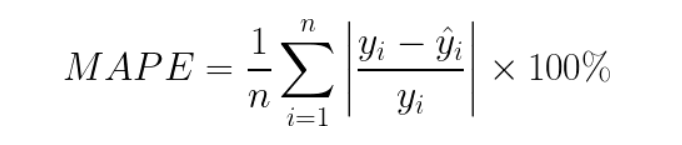

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación, "ŷ_i" es el valor predicho para la i-ésima observación, y el MAPE se calcula como la media de los porcentajes absolutos de las diferencias entre los valores reales y los valores predichos en relación con los valores reales. El resultado se multiplica por 100% para expresar el error como un porcentaje.

El MAPE se utiliza frecuentemente como una métrica de error para evaluar la precisión de las predicciones en problemas de predicción y se expresa como un porcentaje del error medio absoluto en relación con los valores reales. Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: metrics.mean_absolute_percentage_error.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error

##**04 Manos a la obra: otras estrategias para el DummyRegressor**

Como se indica en la documentación,
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

observamos que hay varias enfoques disponibles para implementar el DummyRegressor a través del parámetro 'strategy'. Durante el curso, optamos por la estrategia 'mean (media)', en la cual la salida corresponde a la media del conjunto de datos utilizado para el entrenamiento. Sin embargo, hasta el momento, no hemos explorado las demás estrategias disponibles.

Por lo tanto, sugerimos que pruebes las otras estrategias presentes en el parámetro strategy del DummyRegressor.

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

Opinión del instructor

Respuesta:

Para evaluar los modelos necesitamos utilizar algunas métricas, por lo tanto, vamos a utilizar la función definida durante el curso:



```python
# Tiene formato de código
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regresion(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raíz del Error Cuadrático Medio': round(rmse, 4),
        'Error Absoluto Medio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

```



Para calcular las métricas de acuerdo con las diferentes estrategias, un ejemplo de código se describe a continuación:



```
# Tiene formato de código
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")
```



Salida:




```
# Tiene formato de código


Estrategia: mean
Raíz del Error Cuadrático Medio: 23.2124
Error Absoluto Medio: 18.625
R2 Score: -0.0001

Estrategia: median
Raíz del Error Cuadrático Medio: 23.4093
Error Absoluto Medio: 18.5151
R2 Score: -0.0171

Estrategia: quantile
Raíz del Error Cuadrático Medio: 28.8715
Error Absoluto Medio: 22.1284
R2 Score: -0.5472

Estrategia: constant
Raíz del Error Cuadrático Medio: 23.3724
Error Absoluto Medio: 18.5142
R2 Score: -0.0139
```




El DummyRegressor es una clase de scikit-learn que permite la creación de un modelo simple de referencia (o baseline) para comparación con modelos más complejos. Este modelo no toma en cuenta los datos de entrada y hace predicciones basadas en una estrategia simple especificada.

Las estrategias utilizadas en este código son: "mean", "median", ("quantile", 0.25), ("constant", 10.0). Cada una de estas estrategias define cómo el DummyRegressor hace sus predicciones:

"mean": predice la media de los valores de entrenamiento.
"median": predice la mediana de los valores de entrenamiento.
"quantile": predice un cuantil específico de los valores de entrenamiento. En el caso de este código, se utiliza el cuantil 0.25.
"constant": predice un valor constante especificado. En el caso de este código, se utiliza el valor 10.0.
El código recorre cada una de estas estrategias en un bucle, entrenando un DummyRegressor con la estrategia correspondiente y evaluando su desempeño utilizando un conjunto de métricas de regresión. Las métricas son calculadas por la función calcular_metricas_regresion.

Los resultados se almacenan en un diccionario, donde la clave es la estrategia utilizada y el valor es otro diccionario que contiene las métricas calculadas. Por último, el código imprime los resultados para cada estrategia.

##**05 Entrenando con bosques aleatorios**

TENEMOS BASE LINE CON UN DUMMI REGRESOR

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:

modelo_fly = RandomForestRegressor(max_depth=5, random_state=42)
modelo_fly.fit(X_train_fly,y_train_fly)
ypred_fly = modelo_fly.predict(X_test_fly)
resultados_rf_fly = calcular_regresion(y_test_fly,ypred_fly)
resultados_rf_fly

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

mejoro los tiempos de treaso

https://www.scikit-yb.org/en/latest/api/index.html

Regression Visualizers
Prediction Error Plot
 QUICK METODO SE TOMAN LOS SNIPED

In [51]:
from yellowbrick.regressor import prediction_error

PARA VISUALIZAR VIMOS ENE LA PAAGINA SKIP

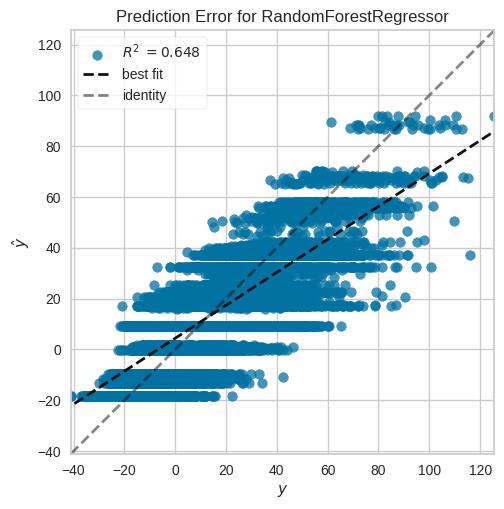

In [52]:
visualizer_fly = prediction_error(modelo_fly, X_train_fly, y_train_fly, X_test_fly, y_test_fly);

In [53]:
# RANDOM FOREST BOSQUES ALEATORIOS
from yellowbrick.regressor import residuals_plot

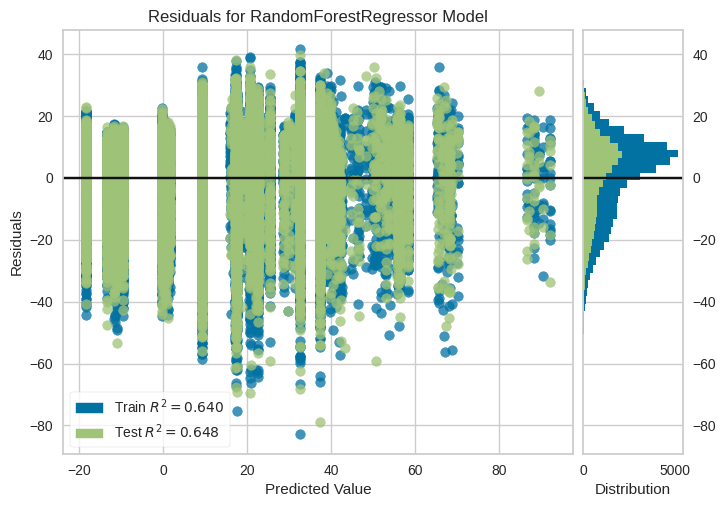

In [54]:
viz_fly = residuals_plot(modelo_fly, X_train_fly, y_train_fly, X_test_fly, y_test_fly);

LA LIEA 0 ES ÑLA RECTA DE MI MODELO
SE MINIMIZA LA DEIFERENCIA EN LOS VALORES

SE DEBEN HACER VALIDACIONES CRUZADAS

##**06 Overfitting en RandomForestRegressor**

Eres un científico de datos en una empresa de consultoría financiera y se te ha solicitado desarrollar un modelo para predecir el precio de las acciones de una empresa de tecnología basado en varias características financieras y económicas. Decidiste utilizar el modelo de regresión Random Forest para crear esta predicción.

¿Cuál de las siguientes afirmaciones sobre el uso del modelo RandomForestRegressor en esta tarea es correcta?

Alternativa correta
La combinación de varios árboles de decisión en un ensemble ayuda a reducir el overfitting, haciendo que el modelo sea más robusto frente a este problema.


El modelo RandomForestRegressor es robusto frente al overfitting debido a la naturaleza de ensemble de los modelos de árboles de decisión, que reduce el overfitting mediante el promedio de varios árboles de decisión.


Alternativa correta
El riesgo de overfitting aumenta considerablemente cuando la profundidad máxima (max_depth) de los árboles de decisión se incrementa excesivamente.


El aumento excesivo de la profundidad máxima de los árboles de decisión en el modelo RandomForestRegressor puede hacerlo susceptible al overfitting. Por lo tanto, es una buena práctica definir el valor del parámetro max_depth al trabajar con modelos basados en árboles.

?

Alternativa INcorreta
Es una técnica de regresión lineal que asume que las relaciones entre las características y la variable objetivo son lineales.


El modelo RandomForestRegressor no asume que las relaciones entre las características y la variable objetivo son lineales; de hecho, es capaz de capturar relaciones no lineales.

No es adecuado para manejar características categóricas, ya que requiere variables numéricas continuas como entrada.


El modelo RandomForestRegressor puede manejar características categóricas, siempre que estén debidamente codificadas, como a través de técnicas de codificación de variables categóricas, como la codificación one-hot (dummy).



##**07 Realizando cross validation**

PARA VALIDACION CRUZADA EN LA PAGINA DE SCIKIT_LEARN TIEN UN RECURSO QUE ES EL KFOLD

In [55]:
from sklearn.model_selection import KFold, cross_validate

In [56]:
# anterior mente eswtabamos funciones de costo entre menor el erro mejor nuestro modelo
# el scoring lista
# funciones de utilidad (valor) , es decir a mayor error mejor desempeño por esos los parametros del scoring
# neg_root_mean_squared_error esete ese el mas negativo
#
scoring_fly = {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

#validacion crusada
cv_fly = KFold(n_splits=5,shuffle=True, random_state=42)
#resultado de la validacion cruzada
cv_results_fly = cross_validate(modelo_fly, X_train_fly, y_train_fly, scoring=scoring_fly, cv=cv_fly)
cv_results_fly

{'fit_time': array([2.90816712, 2.86429834, 3.92914462, 2.85577297, 2.94325733]),
 'score_time': array([0.05429649, 0.05513048, 0.0551753 , 0.05389786, 0.05347323]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}


ROD MEAN SQUARE ERROR
test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
VARIACIONES LEVES PERO CONSISTENTE
EL ANTRIOR ES MENOR


 EL ERROR MEDIO ABSOLUTO
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),

EL COEFICIENTE DE DETERMINACION
'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

CON VALIDACION CRUZADA HAY CONSISTENCIA EN NUESTROS REULTADOS
HASTA ACA ESTA CON HIEPORPARAMETROS SIN ESTIMACION

##**08 Revisando la validación cruzada**

Eres un científico de datos trabajando en un proyecto de predicción de precios de bienes raíces. Has recopilado un conjunto de datos con información sobre varias propiedades, como tamaño, número de habitaciones, ubicación, etc., y deseas entrenar un modelo de regresión para predecir los precios de las propiedades en función de estos atributos.

Para evaluar el rendimiento del modelo de regresión que estás desarrollando, decides usar la validación cruzada. ¿Cuál de las siguientes afirmaciones es verdadera sobre la validación cruzada?

Es una técnica que divide el conjunto de datos en k partes iguales, entrena el modelo en k-1 partes y evalúa el modelo en la parte restante. Esto se repite k veces, cada vez con una parte diferente siendo utilizada como conjunto de prueba.


La validación cruzada es una técnica robusta utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. Divide el conjunto de datos en 'k' partes iguales, o 'folds', entrena el modelo en 'k-1' de estas partes y prueba el modelo en la parte restante. Este proceso se repite 'k' veces, cada vez con una parte diferente siendo utilizada como conjunto de prueba. Cada una de estas iteraciones se llama 'fold', y el promedio de la medida de rendimiento en todas las 'k' iteraciones proporciona una estimación más confiable del rendimiento del modelo.

No es adecuada para problemas de regresión, ya que es más útil para problemas de clasificación.


La validación cruzada es una técnica ampliamente utilizada en problemas de regresión para evaluar el rendimiento de los modelos de manera más robusta y precisa. No está limitada a problemas de clasificación.

Alternativa correta
La validación cruzada implica dividir el conjunto de datos en dos conjuntos: un conjunto de entrenamiento y un conjunto de prueba. El modelo se entrena en el conjunto de entrenamiento y se evalúa en el conjunto de prueba.


La validación cruzada no implica solo una división del conjunto de datos en entrenamiento y prueba.

Se utiliza para entrenar el modelo en solo un subconjunto de los datos y luego evaluarlo en otro subconjunto diferente. Esto ayuda a evitar el sobreajuste del modelo.


La validación cruzada no se limita a entrenar el modelo en solo un subconjunto de los datos.

##**09 Haga lo que hicimos**

En esta clase, entrenamos un modelo dummy y lo evaluamos utilizando las métricas MAE, RMSE y R2. Este modelo fue utilizado como baseline para un modelo de aprendizaje automático más complejo. Luego, utilizamos el RandomForestRegressor para superar el modelo dummy y, por último, realizamos la validación cruzada para evaluar el modelo de manera más precisa.

Por lo tanto, es hora de que sigas el procedimiento realizado durante la clase.

Si surgen preguntas, verifica el progreso de tu proyecto seleccionando la opción Retroalimentación del instructor que está justo abajo.

Opinión del instructor

1 - Entrenamiento del DummyRegressor

Vamos a dividir el conjunto de datos en entrenamiento y prueba.

```python
# Tiene formato de código

from sklearn.model_selection import train_test_split

X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
```



https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

Y luego realizamos el entrenamiento del modelo DummyRegressor.



```python
# Tiene formato de código
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)
y_pred_dummy = model_dummy.predict(X_test)
```



Ahora es necesario evaluar este modelo. Para hacer esto, vamos a construir una función calcular_metricas_regresion para calcular la MAE, RMSE y R2.



```python
# Tiene formato de código
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regresion(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raíz del Error Cuadrático Medio': round(rmse, 4),
        'Error Absoluto Medio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

```



Y entonces, calculamos las métricas para el modelo desarrollado.


```python
# Tiene formato de código
calcular_metricas_regresion(y_test, y_pred_dummy)
```



https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

2 - Entrenamiento del RandomForestRegressor

Ha llegado el momento de construir un modelo que supere al modelo dummy. Para esto, vamos a utilizar el RandomForestRegressor.



```python
# Tiene formato de código
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regresion(y_test, y_pred_rf)
```



https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://www.scikit-yb.org/en/latest/

Además de evaluar el modelo RandomForestRegressor utilizando las métricas, lo evaluaremos gráficamente usando la biblioteca Yellowbrick. Crearemos dos gráficos: uno para los 'errores de predicción' y otro para el 'gráfico de residuos'.

```python
# Tiene formato de código
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)
```

```python
# Tiene formato de código
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)
```





3 - Validación cruzada

Por último, vamos a realizar la validación cruzada para evaluar el modelo de manera más asertiva.

```python
# Tiene formato de código
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)

for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Media: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------')
```



##**10 Lo que aprendimos**

En esta clase, aprendiste a:
Construir un modelo de machine learning como baseline;
Evaluar el modelo de baseline de acuerdo con las métricas RMSE, MAE y R2;
Superar el modelo de baseline con un modelo más complejo (RandomForestRegressor);
Evaluar el RandomForestRegressor gráficamente y con las métricas RMSE, MAE y R2;
Realizar la validación cruzada con el RandomForestRegressor.

#**CLASE 4**

REVISANDO SI LAS COLUMNAS SI DAN VALOR AL MODELO

In [57]:
len(df_fly.columns)

31

VAMOS A REVISAR LOS ATRIBUTOS DE IMPORTANCIA EN NUESTRO MODELO feature_importances_

In [58]:
modelo_fly.feature_importances_

array([3.39814918e-06, 3.60417588e-02, 1.45895991e-01, 6.10861947e-05,
       5.30319673e-01, 1.36989042e-05, 2.14417900e-05, 1.00746574e-01,
       5.76173558e-02, 5.18974843e-04, 8.83162236e-05, 2.64390542e-02,
       4.58830752e-02, 1.01922847e-04, 1.71891675e-04, 1.59736760e-02,
       3.57450957e-05, 9.21269997e-05, 5.42552087e-04, 1.03212932e-02,
       2.09099647e-02, 6.63707069e-03, 2.64070312e-04, 8.68597522e-04,
       1.00052465e-04, 2.79146627e-05, 7.17673254e-05, 3.72705034e-05,
       1.06499638e-04, 8.71862374e-05])

In [59]:
# saber cual es cual atributo
importances_fly = modelo_fly.feature_importances_

In [60]:
#crando el data freme con la lista
feature_importances_fly = pd.DataFrame({'Features':X_fly.columns,'Importances':(importances_fly*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances_fly

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


  LA SUMA DE TODAS LA IMPORTANCIAS DAN 100 % ALGUNAS ESTAN DANDO RUIDO LA AEROLINEA BZ EL R2 DA EL 53 %

HACER LA SELECCION CON MEJOR ANALISIS

In [61]:
# LIST COMPRENHEPTION

[i if i != 0 else 1 for i in range(0,35,5)]

[1, 5, 10, 15, 20, 25, 30]

IMPORTANTE CALCULO CON EL MODELO PARA OBTENER LAS METRICAS PARA TOMAR DECICIONES

In [62]:
resultados_fly = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features_fly = RandomForestRegressor(max_depth=5,random_state=42)
# LISTA DE ALEATORIEDAD Y LIS COMPRENHEPTION
ct_features_fly = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features_fly:
  selected_features_fly = feature_importances_fly['Features'].values[:i]
  X_train_sel_fly = X_train_fly[selected_features_fly]
  X_test_sel_fly = X_test_fly[selected_features_fly]
  model_features_fly.fit(X_train_sel_fly, y_train_fly)
  y_pred_fly = model_features_fly.predict(X_test_sel_fly)
  metricas_fly = calcular_regresion(y_test_fly,y_pred_fly)
  resultados_fly[i] = list(metricas_fly.values())

resultados_fly

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


CON EL ANBTERIOR CODIGO SE VE QUE CON 15 FEATURES SE ESTA BILIZA

REPETIMOS PARA 15 FEATURES

In [63]:
resultados_fly = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features_fly = RandomForestRegressor(max_depth=5,random_state=42)
# LISTA DE ALEATORIEDAD Y LIS COMPRENHEPTION
ct_features_fly = range(10,16)

for i in ct_features_fly:
  selected_features_fly = feature_importances_fly['Features'].values[:i]
  X_train_sel_fly = X_train_fly[selected_features_fly]
  X_test_sel_fly = X_test_fly[selected_features_fly]
  model_features_fly.fit(X_train_sel_fly, y_train_fly)
  y_pred_fly = model_features_fly.predict(X_test_sel_fly)
  metricas_fly = calcular_regresion(y_test_fly,y_pred_fly)
  resultados_fly[i] = list(metricas_fly.values())

resultados_fly

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


ENTRE 10 13 FEATURES SE DECIDE PARA 13 FEATURES

SELECCIONANDO EL MISMO LAS FEATURES E DE LA X_FLY

In [65]:
selected_features_fly = feature_importances_fly['Features'].values[:13]
X_selected_features_fly = X_fly[selected_features_fly]
X_selected_features_fly

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [67]:
X_train_fly,X_test_fly,y_train_fly,y_test_fly = train_test_split(X_selected_features_fly,y_fly,random_state=42)

con este ya tenemos nuestro modelo de prueba para ajustar interparametros

##**03 Optimizando hiperparámetros con GridSearchCV**

se eligioeron las 13 features

In [69]:
param_grid_fly = {
                  'max_depth':[5,10,15],
                  'min_samples_leaf':[1,2,3],
                  'min_samples_split':[2,4,6],
                  'n_estimators':[100,150,200]
                }
# 'max_depth' maxima profundidad  5 o 10 o 15
#  'min_samples_leaf' minimo de muestras de hojas 1 2 3
#  'min_samples_split' minimo de muestras para las divisines  2 4 6
# 'n_estimators' numero de estimadores 100 150 200
# va hacer muchas combinaciones

In [71]:
#tremos los parametros de l celda anterior
from sklearn.model_selection import GridSearchCV
# el GridSearchCV no permite hacaer o cruce de atributos y metriodcas
#los parametros especificadops para un estimador
cv_fly_A = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid_fly = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid=param_grid_fly, scoring='r2',
                          cv=cv_fly_A)

model_grid_fly.fit(X_train_fly,y_train_fly)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [72]:
model_grid_fly.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [74]:
y_pred_grid_fly = model_grid_fly.predict(X_test_fly)
metricas_model_grid_fly = calcular_regresion(y_test_fly,y_pred_grid_fly)
metricas_model_grid_fly

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [77]:
resultados_fly['modelo_grid_fly'] = list(metricas_model_grid_fly.values())
resultados_fly

,10,11,12,13,14,15,modelo_grid_fly
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


LOS RESULTADOS ARRIBA SE VE MEJORA NOTORIA CON ESTE MODELO

##**06 Serializando el modelo**

In [81]:
#GUARDANDO EL MODELO PARA CONSUMO
import pickle
# wb write bynari
# logica de exepcion con try
try:
  with open('modelo_fly_champion.pkl','wb') as file:
    pickle.dump(model_grid_test.best_estimator_,file)
  print('Modelo de vuelos estimado con menor tiempo, serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))

Se presentó un error al almacenar el modelo:  name 'model_grid_test' is not defined


In [82]:
#GUARDANDO EL MODELO PARA CONSUMO
import pickle
# wb write bynari
# logica de exepcion con try
try:
  with open('modelo_fly_champion.pkl','wb') as file:
    pickle.dump(model_grid_fly.best_estimator_,file)
  print('Modelo de vuelos estimado con menor tiempo, serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))

Modelo de vuelos estimado con menor tiempo, serializado con éxito


##**04 Cantidad de combinaciones**

Al usar GridSearchCV para optimizar hiperparámetros, es fundamental entender cuántas veces se entrena y evalúa el algoritmo para determinar la complejidad computacional y el tiempo necesario para la búsqueda de hiperparámetros. En el código a continuación, analiza cuántas veces se entrena y evalúa el algoritmo:



```python
# Tiene formato de código

from sklearn.model_selection import GridSearchCV

param_grid = {
 'max_depth': [5, 10, 15],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [100, 150, 200]
 }

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
model_grid.fit(X_train, y_train)
```

243


Para calcular cuántas veces se entrena y evalúa el algoritmo, multiplicamos el número de combinaciones únicas de hiperparámetros por el número de pliegues en la validación cruzada. Hay 3 opciones para 'max_depth', 3 para 'min_samples_leaf', 3 para 'min_samples_split' y 3 para 'n_estimators'. Por lo tanto, el número total de combinaciones únicas de hiperparámetros es 3 * 3 * 3 * 3 = 81. Como estamos usando validación cruzada de 3 pliegues, cada conjunto de hiperparámetros será entrenado y evaluado 3 veces. Por lo tanto, el algoritmo será entrenado y evaluado 81 * 3 = 243 veces en total.



255


Para determinar el número de veces que el modelo será entrenado y evaluado, es necesario multiplicar la cantidad de valores definidos para cada hiperparámetro por la cantidad de pliegues definidos en la validación cruzada.

Alternativa correta
349


Calcular la cantidad de veces que el modelo será entrenado y evaluado implica multiplicar los valores definidos para cada hiperparámetro por el número de pliegues estipulado en la validación cruzada.

Alternativa correta
355


Para calcular el número de iteraciones en las que el modelo será entrenado y evaluado, es necesario multiplicar el valor especificado para cada hiperparámetro por el número de pliegues establecidos en la validación cruzada.

##**05 Para saber más: hiperparámetros del andomForestRegressor**

El RandomForestRegressor es un modelo de conjunto que combina varios árboles de decisión para hacer predicciones más robustas y precisas a través de la técnica de Bagging.

Los hiperparámetros son configuraciones que puedes ajustar para controlar el comportamiento del RandomForestRegressor. A continuación, se presenta una lista de los principales hiperparámetros:

1 - n_estimators:

Este hiperparámetro especifica el número de árboles de decisión que se crearán en el bosque aleatorio. Cuanto mayor sea el número de estimadores, mayor será la capacidad del modelo para ajustarse a los datos. Sin embargo, un número muy alto puede llevar a un aumento en el tiempo de entrenamiento.
2 - criterion:

El hiperparámetro criterion determina la función de medición de la calidad de una división durante la construcción de los árboles. Para regresión, el valor predeterminado es "mse" (Error Cuadrático Medio), que calcula la media de los cuadrados de los errores. Otra opción es "mae" (Error Absoluto Medio), que utiliza la media de los valores absolutos de los errores.
3 - max_depth:

Este hiperparámetro controla la profundidad máxima de los árboles de decisión en el bosque. Limitar la profundidad puede ayudar a evitar el sobreajuste, ya que impide que los árboles se ajusten demasiado a los datos de entrenamiento y no puedan hacer buenas predicciones para nuevos datos.
4 - min_samples_split:

El min_samples_split determina el número mínimo de muestras necesarias para dividir un nodo interno del árbol. Esto ayuda a controlar el crecimiento de los árboles y evita divisiones que llevan a nodos con pocas muestras.
5 - min_samples_leaf:

Este hiperparámetro define el número mínimo de muestras requeridas en una hoja (nodo terminal) del árbol. Esto ayuda a controlar la granularidad del árbol y puede impedir que las hojas contengan muy pocas muestras.
6 - max_features:

max_features especifica el número máximo de características a considerar al buscar la mejor división en cada nodo. Los valores comunes incluyen "auto" (sqrt(n_features)), "sqrt" (también sqrt(n_features)), "log2" (log2(n_features)), o un número entero que representa la cantidad exacta de características a considerar.
7 - random_state:

Este hiperparámetro define una semilla para el generador de números aleatorios utilizado para crear el bosque aleatorio. Definir un valor fijo para random_state garantiza que el modelo sea reproducible.
8 - n_jobs:

n_jobs especifica el número de núcleos de CPU a utilizar para el entrenamiento en paralelo. Si se define como -1, se utilizarán todos los núcleos disponibles.
Estos son algunos de los principales hiperparámetros del RandomForestRegressor en scikit-learn. La elección adecuada de estos hiperparámetros puede afectar significativamente el rendimiento y la capacidad de generalización del modelo para tareas de regresión. Para consultar los otros hiperparámetros faltantes, puedes consultar la documentación oficial de scikit-learn.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

##**07 Manos a la obra: utilizando el modelo guardado**

Concluimos el proceso de desarrollo, optimización y guardado del modelo. Sin embargo, surge la cuestión de cómo utilizar efectivamente este modelo en situaciones prácticas. ¿Cómo podemos aprovechar el modelo que fue guardado para realizar predicciones actualizadas?

Ante esto, construye un código que cargue el modelo guardado y realice la predicción para la siguiente muestra:

```python
# Tiene formato de código
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
```
Donde los valores corresponden a:




```python
# Tiene formato de código
schengen: 0
arrival_time: 10.8941
is_holiday: 0
is_weekend: 0
airline_BZ: 0
airline_MM: 0
airline_YE: 1
aircraft_type_Airbus A320: 1
aircraft_type_Airbus A330: 0
aircraft_type_Boeing 737: 0
aircraft_type_Boeing 777: 0
aircraft_type_Boeing 787: 0
aircraft_type_Embraer E175: 0
```





Opinión del instructor

Respuesta:

Para realizar la carga y poder predecir una nueva muestra, vamos a adoptar los pasos a continuación:

1 - Asegúrate de tener el archivo del modelo guardado en un lugar accesible. Por ejemplo, la ruta del archivo puede ser ./modelo_produccion.pkl.

2 - Importa la biblioteca pickle en tu código:


```python
# Tiene formato de código
import pickle
```



3 - Carga el modelo guardado utilizando la función pickle.load():

```python
# Tiene formato de código
file_path = './modelos/modelo_produccion.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))
```



El parámetro 'rb' en el método open() de Python significa "read binary" (leer binario). Después de esto, el modelo está cargado y guardado en la variable model.

4 - Ahora puedes usar el modelo cargado para hacer predicciones con los nuevos datos. Asegúrate de que los datos de entrada estén en el formato esperado por el modelo.

```python
# Tiene formato de código
# Ejemplo de predicción con datos de entrada 'X'
model.predict([nueva_muestra])[0]
```
De esta manera, podemos utilizar el modelo guardado previamente para hacer predicciones en nuevos datos.



##**08 Haga lo que hicimos**

En esta clase, nuestro enfoque fue la optimización de hiperparámetros del modelo RandomForestRegressor.
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
 Pasamos por la selección de características, en la cual elegimos las 13 características más importantes del conjunto de datos y reentrenamos el modelo sin pérdida de rendimiento. Luego, realizamos la optimización de hiperparámetros utilizando la técnica GridSearchCV
 https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

 y, por último, guardamos el modelo optimizado para uso futuro.

Ahora, es el momento de que sigas los pasos que se realizaron durante la clase.

Si surge algo que te quede en duda, verifica el avance de tu proyecto haciendo clic en la opción Retroalimentación del instructor que está a continuación.

Opinión del instructor

1 - Selección de características

Vamos a imprimir cuáles son las características más importantes del conjunto de datos para el modelo RandomForestRegressor.
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

```python
# Tiene formato de código
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False)
viz.fit(X_train, y_train)
viz.show()
```



Y vamos a obtener un DataFrame con las importancias de las características en el conjunto de datos.

```python
# Tiene formato de código
importances = model_rf.feature_importances_

feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)
```



Nuestro siguiente paso es realizar el entrenamiento y evaluación del RandomForestRegressor con las 10 a 15 características más importantes:

```python
# Tiene formato de código
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
    selected_features = feature_importances['Features'].values[:count]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df
```



Y luego vamos a separar nuevamente en entrenamiento y prueba con las 13 características más importantes del conjunto de datos:

```python
# Tiene formato de código
selected_features = feature_importances['Features'].values[:13]
X_select_features = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_select_features, y, random_state=42)

```



2 - Optimizando los hiperparámetros con GridSearchCV

Para realizar la optimización de hiperparámetros necesitamos definir el espacio de búsqueda que será utilizado por GridSearchCV.

```python
# Tiene formato de código
param_grid = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 3],
      'min_samples_split': [2, 4, 6],
      'n_estimators': [100, 150, 200]
 }
```



Y luego realizamos la búsqueda de los mejores hiperparámetros.

```python
# Tiene formato de código
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid,
             scoring='r2', cv=cv)

model_grid.fit(X_train, y_train)

```



Ha llegado el momento de evaluar el modelo optimizado utilizando la función para calcular las métricas.

```python
# Tiene formato de código
y_pred_model_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

```



3 - Guardando el modelo

Por último, vamos a guardar el modelo para uso futuro.

```python
# Tiene formato de código
  import pickle

try:
  with open('model_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('¡Modelo guardado con éxito!!!')
except Exception as e:
  print('Ocurrió un error al guardar el modelo: ', str(e))
```



##**10 Lo que aprendimos**

En esta clase, aprendiste a:
Seleccionar las características más importantes para el modelo;
Volver a entrenar el modelo con las características más importantes sin perder rendimiento;
Realizar la optimización de hiperparámetros del modelo utilizando GridSearchCV;
Guardar el modelo construido.